Chapter 8 Tree Based Methods - Question 7

In [3]:
library(MASS)
library(randomForest)

In [4]:
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

In [23]:
#create training data and test data
set.seed(1)
train = sample(1:nrow(Boston),nrow(Boston)/2)
x_train = Boston[train,-14]
y_train = Boston[train,14]
x_test = Boston[-train,-14]
y_test = Boston[-train,14]

In [51]:
#Choosing the size of p
p1 = ncol(Boston)-1
p2 = sqrt(p1)
p3 = p1/2

In [54]:
set.seed(1)
rf.model.p1 = randomForest(x_train,y_train,x_test,y_test,mtry=p1,ntree=500)
rf.model.p2 = randomForest(x_train,y_train,x_test,y_test,mtry=p2,ntree=500)

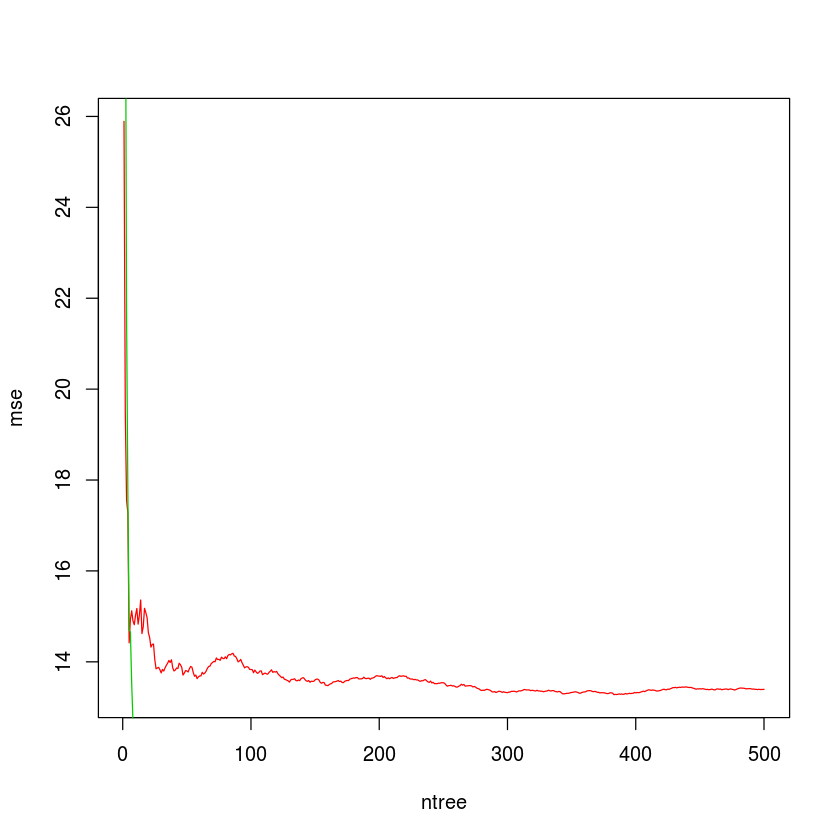

In [55]:
plot(rf.model.p1$test$mse,type="l",col="2",xlab="ntree",ylab="mse")
lines(1:500,rf.model.p2$test$mse,type="l",col="3")

In [56]:
#We can see that that mtry=p2 gives a model with lower mean squared error.
#We can find what number of trees that gives the lowest mean squared error in rf.model.p2
which.min(rf.model.p2$test$mse)

[1] 39

In [57]:
#Now we will use ntree =39 and mtry = p2 to retrain the regression tree model
rf.model = randomForest(x_train,y_train,x_test,y_test,mtry=p2,ntree=39)

In [58]:
cor(rf.model$test$predicted,y_test)

[1] 0.9358717